In [1]:
import pandas as pd 
import math as m
import numpy as np
import matplotlib.pyplot as plt
%pylab inline
import plotly.tools as tls
import plotly.plotly as py
from dateutil.parser import parse
from dateutil import parser
import time
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [22]:
geneValues = pd.read_csv('fpkm_table.csv') #open text files

#geneArray = np.array(geneValues)
#geneArray.shape #number rows by number columns

In [35]:
geneValuesT = geneValues.T
print(geneValuesT.shape) #verify transpose is correct
geneValuesT.head() #verify transpose is correct

(1773, 45771)


,0,1,2,3,4,5,6,7,8,9,...,45761,45762,45763,45764,45765,45766,45767,45768,45769,45770
gene_id \ rnaseq_profile_id,5.006997e+08,5.006997e+08,5.006997e+08,500699672.0,5.006997e+08,500699674.0,5.006997e+08,500699676.0,500699677.0,500699678.0,...,5.007455e+08,500745455.0,500745456.0,500745457.0,5.007455e+08,5.007455e+08,5.007455e+08,5.007455e+08,500745462.0,5.007455e+08
497122137,6.870000e+00,3.038000e+01,3.000000e-02,0.0,1.820000e+00,0.0,0.000000e+00,0.0,0.0,0.0,...,1.002130e+03,0.0,0.0,0.0,2.764600e+02,2.084100e+02,0.000000e+00,1.322390e+03,0.0,0.000000e+00
497122141,1.761000e+01,0.000000e+00,0.000000e+00,0.0,4.910000e+00,0.0,0.000000e+00,0.0,0.0,0.0,...,9.149900e+02,0.0,0.0,0.0,3.917400e+02,3.042500e+02,2.762000e+01,1.997360e+03,0.0,2.908000e+01
497122142,0.000000e+00,0.000000e+00,0.000000e+00,0.0,2.060000e+00,0.0,0.000000e+00,0.0,0.0,0.0,...,7.278100e+02,0.0,0.0,0.0,2.804400e+02,4.700200e+02,5.267000e+01,2.439130e+03,0.0,0.000000e+00
497122143,3.500000e-01,0.000000e+00,1.220000e+00,0.0,3.460000e+00,0.0,2.300000e-01,0.0,0.0,0.0,...,8.059300e+02,0.0,0.0,0.0,6.374500e+02,3.362600e+02,0.000000e+00,1.357050e+03,0.0,0.000000e+00


In [36]:
geneValuesT.to_csv('fpkm_table_T.csv')

In [25]:
geneArrayT = np.transpose(geneArray) #transpose
geneArrayT.nbytes

649215864

In [26]:
geneArrayT.shape #verify it transposed array

(1773L, 45771L)

In [27]:
np.reshape(geneArrayT,(1773,45771))

array([[  5.00699669e+08,   5.00699670e+08,   5.00699671e+08, ...,
          5.00745461e+08,   5.00745462e+08,   5.00745463e+08],
       [  6.87000000e+00,   3.03800000e+01,   3.00000000e-02, ...,
          1.32239000e+03,   0.00000000e+00,   0.00000000e+00],
       [  1.76100000e+01,   0.00000000e+00,   0.00000000e+00, ...,
          1.99736000e+03,   0.00000000e+00,   2.90800000e+01],
       ..., 
       [  4.90000000e+00,   0.00000000e+00,   3.09000000e+00, ...,
          2.77802000e+03,   0.00000000e+00,   0.00000000e+00],
       [  2.11400000e+01,   0.00000000e+00,   5.01000000e+00, ...,
          1.84437000e+03,   2.44100000e+01,   2.44100000e+01],
       [  1.09200000e+01,   0.00000000e+00,   7.34000000e+00, ...,
          2.29916000e+03,   0.00000000e+00,   3.13300000e+01]])

In [28]:
geneArrayT.shape
geneArrayT.nbytes

649215864

In [29]:
geneArrayT.dtype #check data type

dtype('float64')

In [16]:
numpy.savetxt("fpkm_table_T.csv", geneArrayT, delimiter=",")

int 32 for 0 and float 16 for rest

In [3]:
geneNames = pd.read_csv('rows-genes.csv') #open text files
geneNames.shape #number rows by number columns

(45771, 5)

In [4]:
genesMerged = pd.merge(geneNames, geneValues, how='outer', on='gene_id \ rnaseq_profile_id', 
         left_on=None, right_on=None,
         left_index=False, right_index=True, sort=False,
         suffixes=('_x', '_y'), copy=True, indicator=True)

KeyError: 'gene_id \\ rnaseq_profile_id'

In [11]:
geneValues.head()

,gene_id \ rnaseq_profile_id,497122137,497122141,497122142,497122143,497122144,497122145,497122146,497122147,497122148,...,497124710,497124711,497124712,497124713,497124714,497124715,497124716,497124717,497124718,497124719
0,500699669,6.87,17.61,0.00,0.35,1.32,0.69,0.44,0.31,8.31,...,1.76,6.52,0.64,2.38,3.49,14.22,8.61,4.90,21.14,10.92
1,500699670,30.38,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,500699671,0.03,0.00,0.00,1.22,0.35,0.58,0.38,2.99,2.59,...,5.97,0.14,0.56,11.05,0.00,8.93,0.66,3.09,5.01,7.34
3,500699672,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,500699673,1.82,4.91,2.06,3.46,2.57,2.75,2.47,7.36,6.60,...,0.02,0.83,7.33,3.47,0.34,2.41,1.47,0.00,5.53,4.82


In [10]:
geneValues['gene_id \ rnaseq_profile_id'].value_counts(sort = True, ascending = False)

500701181    1
500718913    1
500739423    1
500737374    1
500743517    1
500741468    1
500731227    1
500729178    1
500735321    1
500733272    1
500706639    1
500704590    1
500710733    1
500708684    1
500702537    1
500700488    1
500723015    1
500720966    1
500727109    1
500725060    1
500714819    1
500716896    1
500718945    1
500712802    1
500706671    1
500739455    1
500737406    1
500743549    1
500741500    1
500731259    1
            ..
500714140    1
500724379    1
500726426    1
500720281    1
500722328    1
500699799    1
500701846    1
500744877    1
500703921    1
500732615    1
500718270    1
500734662    1
500728517    1
500730564    1
500740803    1
500742850    1
500736705    1
500738752    1
500716223    1
500712125    1
500710066    1
500714172    1
500724411    1
500726458    1
500720313    1
500722360    1
500699831    1
500701878    1
500708019    1
500701187    1
Name: gene_id \ rnaseq_profile_id, dtype: int64

In [49]:
genesMerged.transpose()

,0,1,2,3,4,5,6,7,8,9,...,45761,45762,45763,45764,45765,45766,45767,45768,45769,45770
gene_id \ rnaseq_profile_id,500699669,500699670,500699671,500699672,500699673,500699674,500699675,500699676,500699677,500699678,...,500745454,500745455,500745456,500745457,500745458,500745459,500745460,500745461,500745462,500745463
chromosome,1,1,1,1,1,1,1,1,1,1,...,MT,MT,MT,MT,MT,MT,MT,MT,MT,MT
gene_entrez_id,497097,100418032,105243853,664792,105242387,105242467,619785,19888,20671,664830,...,17719,17732,17743,17736,17721,17722,17729,17711,17744,17739
gene_symbol,Xkr4,Gm18956,LOC105243853,Gm7341,LOC105242387,LOC105242467,Gm6101,Rp1,Sox17,Gm7357,...,ND4,TrnH,TrnS2,TrnL2,ND5,ND6,TrnE,CYTB,TrnT,TrnP
gene_name,X Kell blood group precursor related family me...,"predicted gene, 18956",uncharacterized LOC105243853,predicted gene 7341,uncharacterized LOC105242387,lipoxygenase homology domain-containing protein 1,predicted gene 6101,retinitis pigmentosa 1 (human),SRY (sex determining region Y)-box 17,predicted gene 7357,...,NADH dehydrogenase subunit 4,tRNA-His,tRNA-Ser,tRNA-Leu,NADH dehydrogenase subunit 5,NADH dehydrogenase subunit 6,tRNA-Glu,cytochrome b,tRNA-Thr,tRNA-Pro
497122137,6.87,30.38,0.03,0,1.82,0,0,0,0,0,...,1002.13,0,0,0,276.46,208.41,0,1322.39,0,0
497122141,17.61,0,0,0,4.91,0,0,0,0,0,...,914.99,0,0,0,391.74,304.25,27.62,1997.36,0,29.08
497122142,0,0,0,0,2.06,0,0,0,0,0,...,727.81,0,0,0,280.44,470.02,52.67,2439.13,0,0
497122143,0.35,0,1.22,0,3.46,0,0.23,0,0,0,...,805.93,0,0,0,637.45,336.26,0,1357.05,0,0
497122144,1.32,0,0.35,0,2.57,0,0.13,0,0,0,...,904.15,0,0,0,255.59,272.68,70.28,1622.93,0,0


In [ ]:
sns.violinplot(x='gene_id \ rnaseq_profile_id', y = '497122137', hue=None, data=geneValues, order=None, hue_order=None, 
                   bw='scott', cut=2, scale='area', scale_hue=True, gridsize=100, 
                   width=0.8, inner='box', split=False, dodge=True, orient=None, 
                   linewidth=None, color=None, palette=None, saturation=0.75, ax=None)

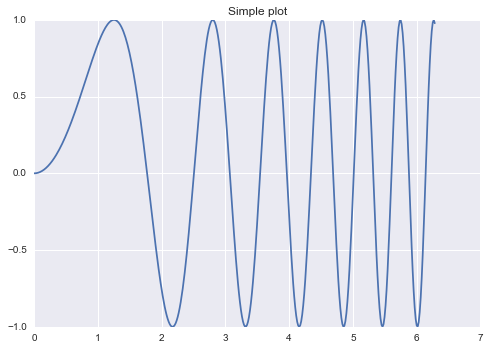

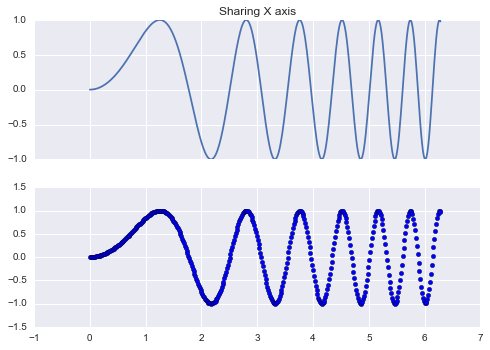

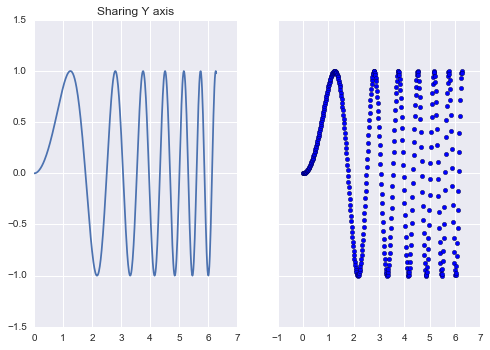

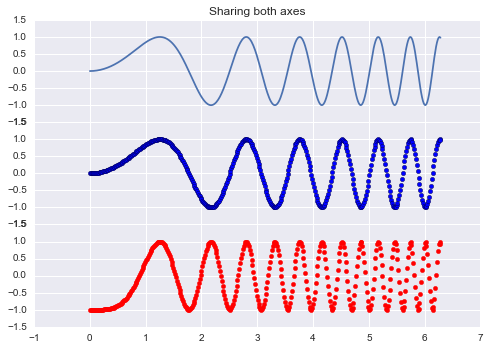

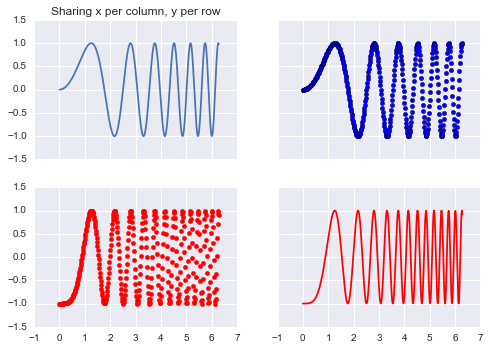

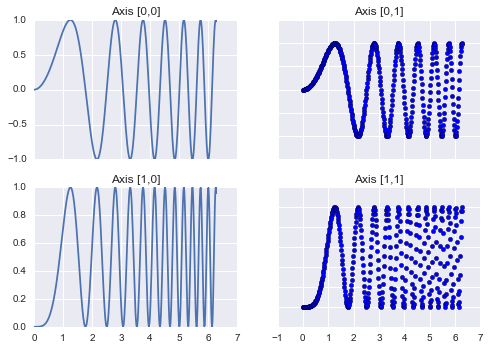

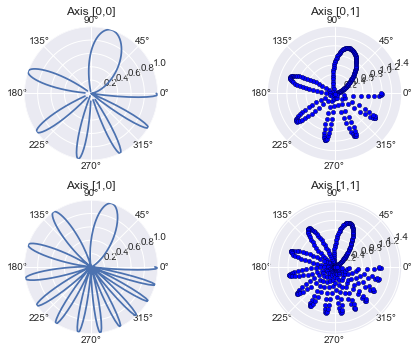

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Simple data to display in various forms
x = np.linspace(0, 2 * np.pi, 400)
y = np.sin(x ** 2)

plt.close('all')

# Just a figure and one subplot
f, ax = plt.subplots()
ax.plot(x, y)
ax.set_title('Simple plot')

# Two subplots, the axes array is 1-d
f, axarr = plt.subplots(2, sharex=True)
axarr[0].plot(x, y)
axarr[0].set_title('Sharing X axis')
axarr[1].scatter(x, y)

# Two subplots, unpack the axes array immediately
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.plot(x, y)
ax1.set_title('Sharing Y axis')
ax2.scatter(x, y)

# Three subplots sharing both x/y axes
f, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, sharey=True)
ax1.plot(x, y)
ax1.set_title('Sharing both axes')
ax2.scatter(x, y)
ax3.scatter(x, 2 * y ** 2 - 1, color='r')
# Fine-tune figure; make subplots close to each other and hide x ticks for
# all but bottom plot.
f.subplots_adjust(hspace=0)
plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)

# row and column sharing
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')
ax1.plot(x, y)
ax1.set_title('Sharing x per column, y per row')
ax2.scatter(x, y)
ax3.scatter(x, 2 * y ** 2 - 1, color='r')
ax4.plot(x, 2 * y ** 2 - 1, color='r')

# Four axes, returned as a 2-d array
f, axarr = plt.subplots(2, 2)
axarr[0, 0].plot(x, y)
axarr[0, 0].set_title('Axis [0,0]')
axarr[0, 1].scatter(x, y)
axarr[0, 1].set_title('Axis [0,1]')
axarr[1, 0].plot(x, y ** 2)
axarr[1, 0].set_title('Axis [1,0]')
axarr[1, 1].scatter(x, y ** 2)
axarr[1, 1].set_title('Axis [1,1]')
# Fine-tune figure; hide x ticks for top plots and y ticks for right plots
plt.setp([a.get_xticklabels() for a in axarr[0, :]], visible=False)
plt.setp([a.get_yticklabels() for a in axarr[:, 1]], visible=False)

# Four polar axes
f, axarr = plt.subplots(2, 2, subplot_kw=dict(projection='polar'))
axarr[0, 0].plot(x, y)
axarr[0, 0].set_title('Axis [0,0]')
axarr[0, 1].scatter(x, y)
axarr[0, 1].set_title('Axis [0,1]')
axarr[1, 0].plot(x, y ** 2)
axarr[1, 0].set_title('Axis [1,0]')
axarr[1, 1].scatter(x, y ** 2)
axarr[1, 1].set_title('Axis [1,1]')
# Fine-tune figure; make subplots farther from each other.
f.subplots_adjust(hspace=0.3)

plt.show()

the shape of z is: (10L, 500L)


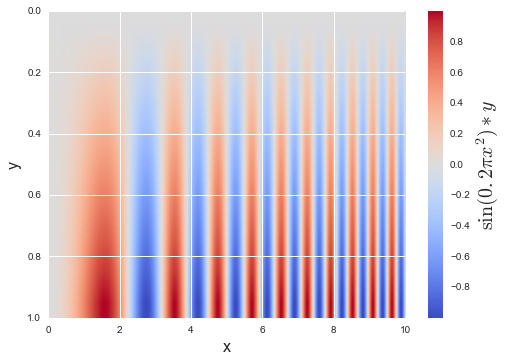

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# Create some datapoints
x = np.linspace(0,10,num=500)
y = np.linspace(0,1,num=10)

#create a meshgrid (evenly spaced 2d array on each axis)
XX, YY = np.meshgrid(x, y)

## make ZZ a function of XX and YY
ZZ = np.sin(0.2*np.pi*XX**2) * YY

# Create figure and axes object
fig, ax = plt.subplots()

# Plot colormap and add colorbar scale 
image_plot = ax.imshow(ZZ,cmap='coolwarm', extent=[0,10,1,0],aspect="auto") 
# image_plot = ax.matshow(ZZ,cmap='coolwarm',origin="lower") 

#make a colorbar
cbar = plt.colorbar(image_plot)
#set the colorbar's label properties, including an example of using LaTex code
cbar.set_label('$\sin(0.2 \pi x^2)*y$',fontsize=20,rotation=90)

ax.set_xlabel('x',fontsize=16)
ax.set_ylabel('y',fontsize=16)

print('the shape of z is: '+str(np.shape(ZZ)))

methods = ['none']

In [37]:
geneValuesV1 = pd.read_csv('genes_rpkm_V1.csv')
geneValuesV1_namedropped = geneValuesV1.drop('Gene', axis=1)
V1cellRowMeans = geneValuesV1_namedropped.mean(axis=1)

In [44]:
geneValuesV1['mean'] = geneValuesV1_namedropped.mean(axis = 1)
geneValuesV1['std'] = geneValuesV1_namedropped.std(axis = 1)

In [52]:
x = geneValuesV1['Gene']
y = geneValuesV1['mean']

geneValuesV1.plot(x = geneValuesV1['Gene'], y = geneValuesV1['mean'], kind = 'bar')

KeyError: '[  6.86241811e-02   1.13754759e+02   1.10568255e+01 ...,   1.59461604e+03\n   8.16993913e+02   8.16993913e+02] not in index'

test